## Timps

#### Debugging a learning algorithm
Let's say we have built a regualrised linear regression system for the house costs, but still gives huge errors, what to do next?
1) Get more training examples
2) Try smaller sets of features
3) Try getting additional features
4) Try adding polynomial features
5) Try decreasing $\lambda$
6) Try increasing $\lambda$

How to choose better options <br>
How to run diagnostics in order to find the best algorithm, and this will tell what is important and what is not...

## Evaluating and choosing model

To evaluate the model, you can split  the training set into two subsets and use one of them for training and other for testing the model

Now, <br>
$m_{train}$ will be used for the training set and <br>
$m_{test}$ will be used for the testing set

The way to calculate accuracy is, after fitting the model with the training data, we calculate the cost using the testing data as the input, and it is also good to calculate the training error, mind it, these do not include the regularisation term

For classification error calculation we may very well use the same definition as the binary cross entropy definition but there is a better algorithm , and that is to __calculate the fraction of the test set and the fraction of the training set that the model has misclassified__

## Refinement about model selection and cross validation and test sets

#### Choosing a model
you could consider, a first order, second order, or any n order polynomial 

One thing we could try is doing all the tests by hard coding and find the error, but this is __flaud__, as the test error is likely to be lower than the generelization error

### A better way of choosing a model
Rather than splitting the training set into just subsets we will split them into three subsets, training, cross validation and test sets, as 60/20/20 percents where:
$$m_{cv} \text{ is for the cross validation, aka dev set or development set or  validation set}$$

#### Model selection
We will calculate the cross validation error, and then choose the model according to the least cross validation error, and then we will estimate the generelization error as the test set.

similarly works for neural network architecture as well

In [1]:
# for the arrays and stuff
import numpy as np

# for building linear regression models and preparing the data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# fro building and training neural networks
import tensorflow as tf

# for plotting the curves
import matplotlib.pyplot as plt

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [2]:
# creating some data
np.random.seed(1000)
x = np.random.randint(1700, 3750, 50)
y = 15*np.sqrt(x) + np.random.randint(-7, 7, 50)

# Convert the 1D arrays into 2D arrays as we will be using tensorflow later
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the input x is {x.shape}")
print(f"the shape of the output y is {y.shape}")

the shape of the input x is (50, 1)
the shape of the output y is (50, 1)


In [3]:
# good to check some values
print(f"the first 5 values of the input look like \n{x[:5]}")
print(f"the first 5 values of the output look like \n{y[:5]}")

the first 5 values of the input look like 
[[3159]
 [2299]
 [3072]
 [2469]
 [2252]]
the first 5 values of the output look like 
[[840.07]
 [713.22]
 [824.38]
 [747.34]
 [705.83]]


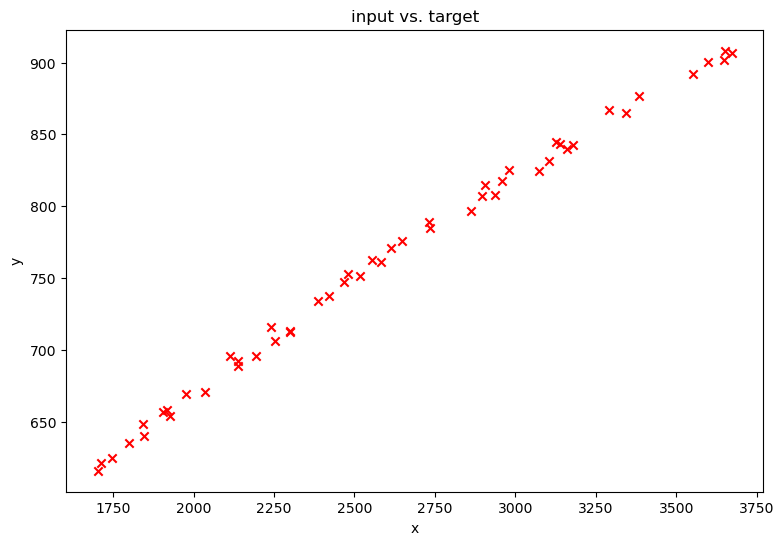

In [4]:
# plotting the entire function 
fig, ax = plt.subplots(1, 1, figsize =(9, 6))
ax.set_title("input vs. target")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(x, y, marker='x', c='r')

In [5]:
# splitting the dataset into three parts
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.4, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state=1)

del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


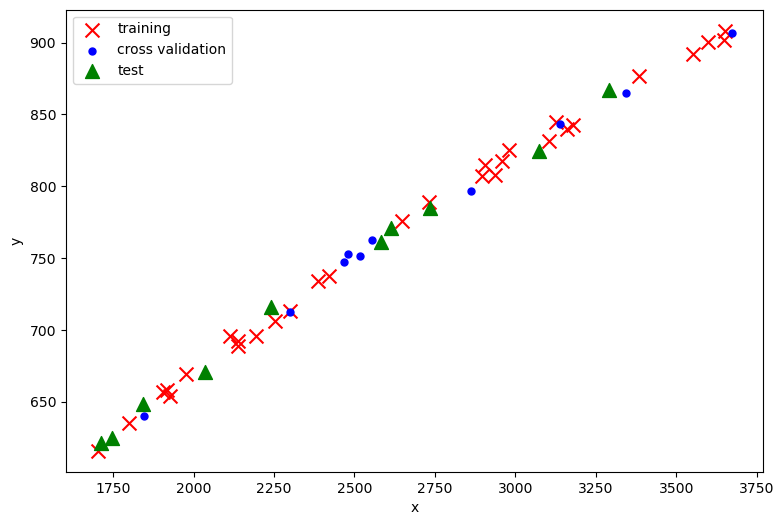

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.set_label("input vs. target")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, marker='x', c='r', s=100, label='training')
ax.scatter(x_cv, y_cv, marker='.', c='b', s = 100, label='cross validation')
ax.scatter(x_test, y_test, marker='^', c='g', s=100, label='test')
ax.legend()

In [7]:
# initialize the class
scaler_linear = StandardScaler()

# compute the mean and standard deviation of the training set then transform it
x_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2654.27
Computed standard deviation of the training set: 598.47


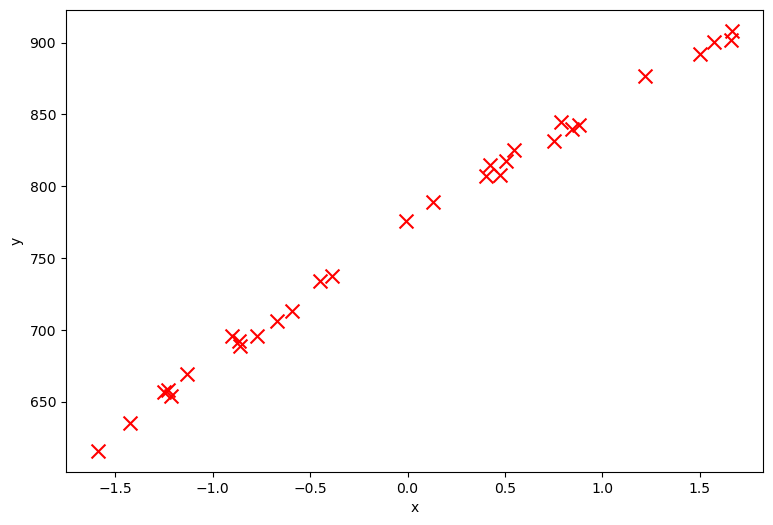

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.set_label('scaled input vs. target')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x_train_scaled, y_train, s=100, marker='x', c='r')

In [9]:
# initialize the class
linear_model = LinearRegression()

# train your model
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [10]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train_scaled)

# Use scikit-learn's utility funtion and divid by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat)/2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i = (yhat[i]-y_train[i])**2
    total_squared_error += squared_error_i
mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 18.879989083201256
training MSE (for-loop implementation): 18.87998908320125


In [11]:
# Scale the cross validation set using the mean and standard deviation of the training set
x_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(x_cv_scaled)

# calculating the error using scikit-learn's utility function
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat)/2}")

Mean used to scale the CV set: 2654.27
Standard deviation used to scale the CV set: 598.47
Cross validation MSE: 25.313483492084863


## Adding Polynomial Features

#### Create teh additional features

In [12]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# compute the number of features and transform the training set
x_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(x_train_mapped[:5])

[[2.14e+03 4.58e+06]
 [3.65e+03 1.33e+07]
 [1.70e+03 2.90e+06]
 [1.80e+03 3.24e+06]
 [1.98e+03 3.91e+06]]


In [13]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transfor it
x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)

# Preview the first 5 elements of the scaled training set
print(x_train_mapped_scaled[:5])

[[-0.86 -0.87]
 [ 1.66  1.83]
 [-1.59 -1.39]
 [-1.43 -1.29]
 [-1.13 -1.08]]


In [14]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(x_train_mapped_scaled, y_train)

# Compute the training MSE
yhat = model.predict(x_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat)/2}")

# Add the polynomial features to the cross validation set
x_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)

# compute the cross validation MSE
yhat = model.predict(x_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat)/2}")

Training MSE: 7.390855205762089
Cross validation MSE: 8.507062755485519


In [15]:
# initialize lists containing the lists, models, and scalars
train_mses = []
cv_mses = []
models = []
scalers = []

for degree in range(1, 11):
    # Add polynomial feature to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)

    # Scale the training set
    scaler_poly = StandardScaler()
    x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled, y_train)
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat)/2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    x_cv_mapped = poly.fit_transform(x_cv)
    x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat)/2
    cv_mses.append(cv_mse)

In [16]:
print(f"The MSEs for the training set are : {train_mses}")
print(f"The MSEs for the cross validation set are : {cv_mses}")

The MSEs for the training set are : [18.879989083201256, 7.390855205762089, 7.370878650531098, 7.354587548491163, 7.0503689539688095, 6.213774463569319, 6.197683010140142, 5.546379718757839, 5.544785412394862, 5.516335903356048]
The MSEs for the cross validation set are : [25.313483492084863, 8.507062755485519, 8.653623264461848, 8.457112430055542, 9.567539202475075, 9.329371136785902, 9.577666788673637, 9.984532873808522, 10.258959138604233, 9.868774167093274]


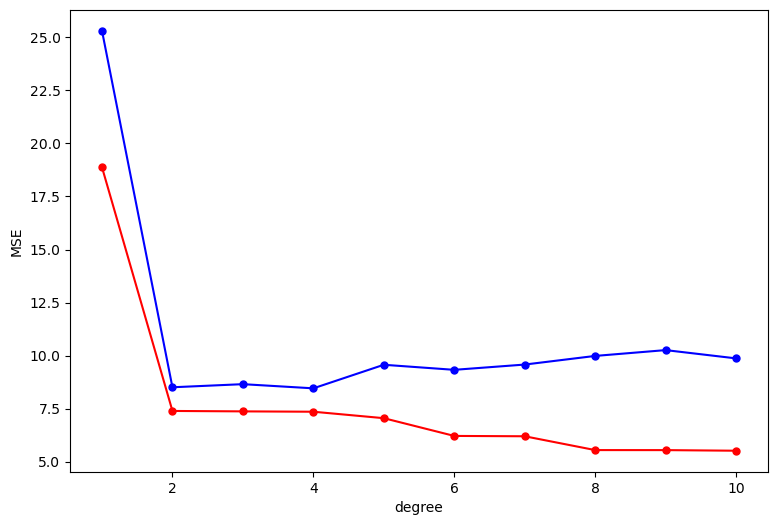

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
degree = range(1, 11)
ax.set_label('degree of polynomial vs. train and CV MSEs')
ax.set_xlabel('degree')
ax.set_ylabel('MSE')
ax.plot(degree, cv_mses, '-o', c='b', markersize=5)
ax.plot(degree, train_mses, '-o', c='r', markersize=5)

In [18]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [19]:
# Adding polynomial features to run test set
poly = PolynomialFeatures(degree = 4, include_bias=False)
x_test_mapped = poly.fit_transform(x_test)

# Scaling the features using the training set
x_test_mapped_scaled = scalers[degree-1].transform(x_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat)

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 7.35
Cross Validation MSE: 8.46
Test MSE: 21.34


## Neural Networks

You will use the same training, cross validation, and test sets you generated in the previous section. From earlier lectures in this course, you may have known that neural networks can learn non-linear relationships so you can opt to skip adding polynomial features. The code is still included below in case you want to try later and see what effect it will have on your results. The default degree is set to 1 to indicate that it will just use x_train, x_cv, and x_test as is (i.e. without any additional polynomial features).

In [20]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
x_train_mapped = poly.fit_transform(x_train)
x_cv_mapped = poly.transform(x_cv)
x_test_mapped = poly.transform(x_test)

In [21]:
# Scale the features using the z-score

scaler = StandardScaler()
x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
x_test_mapped_scaled = scaler.transform(x_test_mapped)

In [22]:
# The models to be used
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_models():
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

In [23]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = build_models()

# Loop over the models
for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
        loss = 'mse',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_train_mapped_scaled, y_train,
        epochs = 300,
        verbose = 0,
    )

    print("Done!\n")

    # Record the training MSEs
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat)/2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat)/2
    nn_cv_mses.append(cv_mse)

# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
    )

Training model_1...


Done!

1/1 [==============================] - 0s 25ms/step
Training model_2...
Done!

1/1 [==============================] - 0s 44ms/step
Training model_3...
Done!

1/1 [==============================] - 0s 44ms/step
RESULTS:
Model 1: Training MSE: 19.20, CV MSE: 25.78
Model 2: Training MSE: 18.88, CV MSE: 25.73
Model 3: Training MSE: 18.88, CV MSE: 25.32


In [24]:
# Select the model with lowest CV MSE
model_num = 1

# Compute the test MSE
yhat = nn_models[model_num-1].predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat)/2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 [==============================] - 0s 39ms/step
Selected Model: 1
Training MSE: 19.20
Cross Validation MSE: 25.78
Test MSE: 21.72
